## importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import spacy
import re
from nltk.tokenize import sent_tokenize,word_tokenize

In [2]:
data=pd.read_csv('webmd.csv')

In [3]:
data.head(100)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,35-44,Abnormally Long or Heavy Periods,3/1/2012,lysteda,154120,5,5,Heavy periods all my life. My doc found I had ...,4,Female,"Nausea , vomiting , diarrhea , and muscle p...",8
96,35-44,Abnormally Long or Heavy Periods,2/21/2012,lysteda,154120,5,5,Thank you Ferring pharmaceuticals! I have trie...,5,Female,"Nausea , vomiting , diarrhea , and muscle p...",4
97,25-34,Abnormally Long or Heavy Periods,2/11/2012,lysteda,154120,5,3,Was given lysteda to help with heavy periods a...,2,Female,"Nausea , vomiting , diarrhea , and muscle p...",4
98,19-24,Abnormally Long or Heavy Periods,2/9/2012,lysteda,154120,5,1,I have been menstruating for two years straigh...,1,Female,"Nausea , vomiting , diarrhea , and muscle p...",0


### combining some columns text into one column of text

In [4]:
data['review']=data['Condition']+" "+data['Reviews']+" "+data['Sides'].astype(str)

In [5]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,review
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Stuffy Nose I'm a retired physician and of all...
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Cold Symptoms cleared me right up even with my...
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Other why did my PTINR go from a normal of 2.5...
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Other FALLING AND DON'T REALISE IT
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Other My grandfather was prescribed this medic...


In [6]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'review'],
      dtype='object')

### Feature extraction only keeping useful features

In [7]:
data.drop(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews','Sex', 'Sides',
       'UsefulCount'],axis=1,inplace=True)

In [8]:
data=data[['review','Satisfaction']]

In [9]:
data.head()

,review,Satisfaction
0,Stuffy Nose I'm a retired physician and of all...,5
1,Cold Symptoms cleared me right up even with my...,5
2,Other why did my PTINR go from a normal of 2.5...,3
3,Other FALLING AND DON'T REALISE IT,1
4,Other My grandfather was prescribed this medic...,1


In [10]:
data.shape

(362806, 2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   review        362769 non-null  object
 1   Satisfaction  362806 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


In [12]:
data.describe()

,Satisfaction
count,362806.000000
mean,3.135408
std,1.611106
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,10.000000


In [13]:
data.Satisfaction.value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

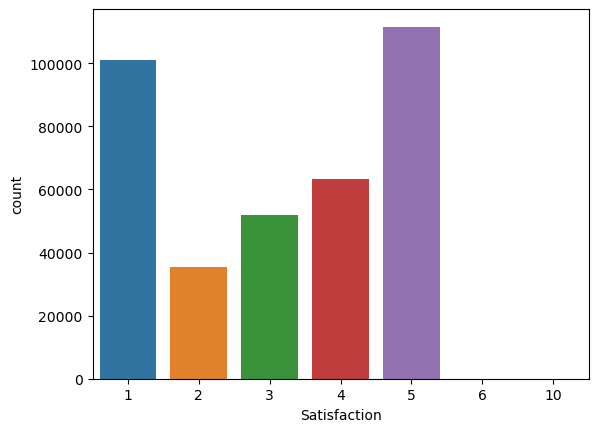

In [14]:
sns.countplot(x=data.Satisfaction,data=data)

### Classifying the satisfaction into positive negative and neutral

In [15]:
data['sentiment']=data['Satisfaction'].map(lambda x:'negative' if x<=2 else('neutral' if x<=3 else 'positive'))

In [16]:
data.head()

,review,Satisfaction,sentiment
0,Stuffy Nose I'm a retired physician and of all...,5,positive
1,Cold Symptoms cleared me right up even with my...,5,positive
2,Other why did my PTINR go from a normal of 2.5...,3,neutral
3,Other FALLING AND DON'T REALISE IT,1,negative
4,Other My grandfather was prescribed this medic...,1,negative


### dropping the Satisfaction column

In [17]:
data.drop(['Satisfaction'],axis=1,inplace=True)

In [18]:
data.head()

,review,sentiment
0,Stuffy Nose I'm a retired physician and of all...,positive
1,Cold Symptoms cleared me right up even with my...,positive
2,Other why did my PTINR go from a normal of 2.5...,neutral
3,Other FALLING AND DON'T REALISE IT,negative
4,Other My grandfather was prescribed this medic...,negative


### Maping positive->2, neutral->1 and negative->0

In [19]:
data.sentiment=data.sentiment.map({
    'positive':2,
    'neutral':1,
    'negative':0
})

In [20]:
data.head()

,review,sentiment
0,Stuffy Nose I'm a retired physician and of all...,2
1,Cold Symptoms cleared me right up even with my...,2
2,Other why did my PTINR go from a normal of 2.5...,1
3,Other FALLING AND DON'T REALISE IT,0
4,Other My grandfather was prescribed this medic...,0


In [21]:
data.sentiment.value_counts()

2    174711
0    136243
1     51852
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

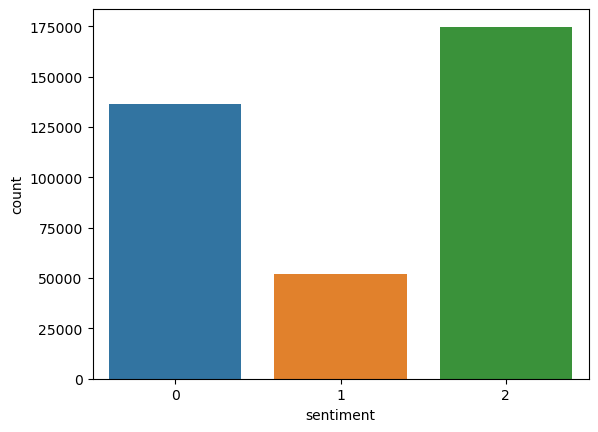

In [22]:
sns.countplot(x=data.sentiment,data=data)

In [23]:
data.review=data.review.astype(str)

In [24]:
def calculate_frequency(text):
    freq=[]
    for word in text.split():
        freq.extend(word)
    #generating the word frequencies using value_counts in the list
    word_freq=pd.Series(freq).value_counts()
    word_freq[:100]
    return word_freq

In [25]:
freq=calculate_frequency(data.review.str)

In [26]:
freq

,                 1225888
I                  924766
the                663471
and                660999
to                 554268
                   ...   
affects.sounds          1
tubes...                1
hangover!!              1
thyroiditis;            1
stepmother              1
Length: 373765, dtype: int64

## Generating the wordcloud before data-preprocessing

In [27]:
import wordcloud
from wordcloud import WordCloud

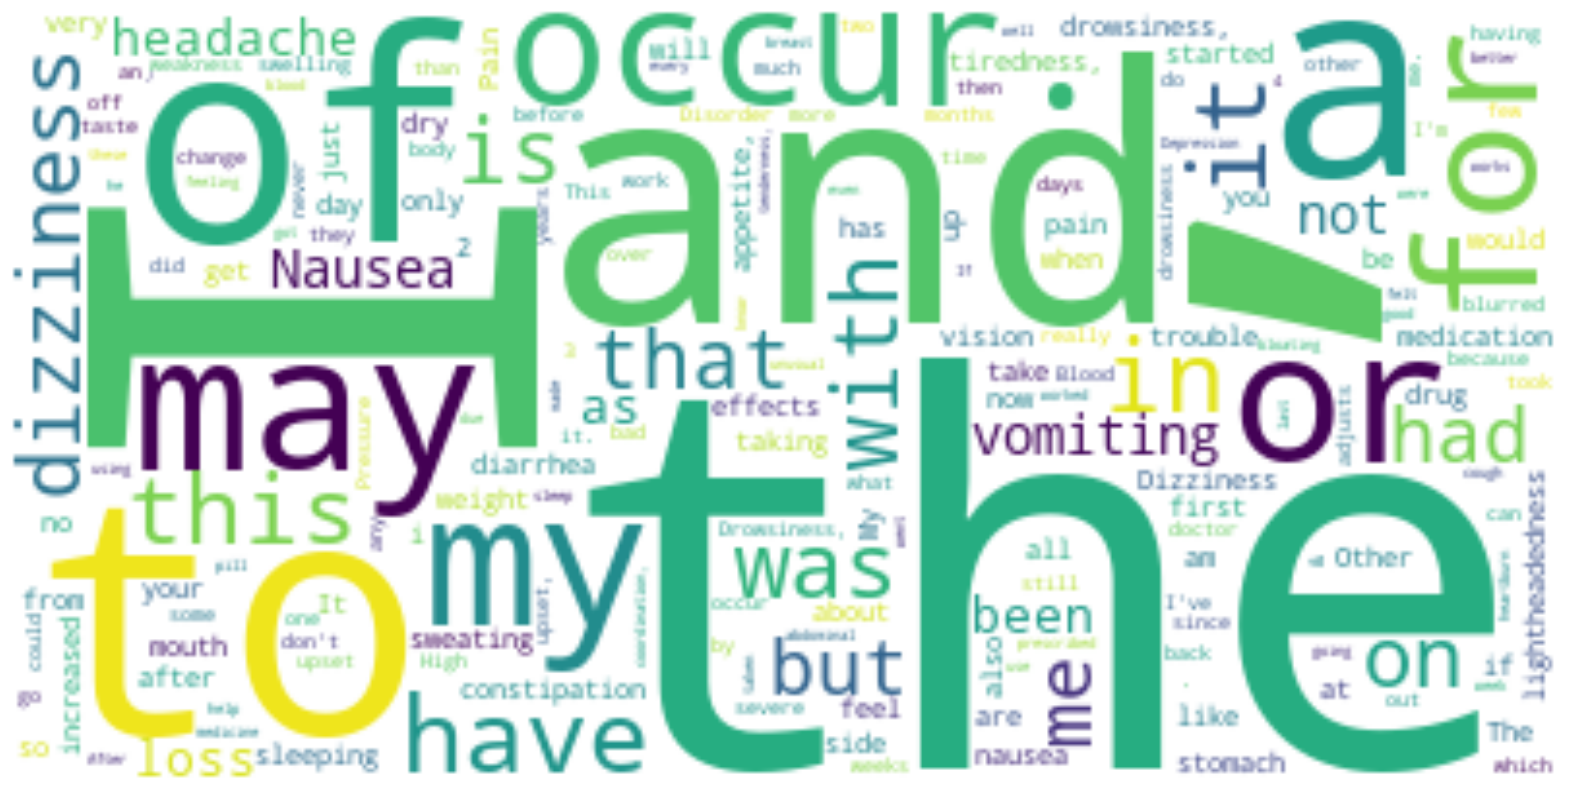

In [28]:
plt.figure(figsize=(20,20))
wordc=WordCloud(max_words=200,width=400,height=200,background_color='white').generate_from_frequencies(freq)
plt.axis('off')
plt.imshow(wordc,interpolation='bilinear')
plt.show()

### 1. For Positive reviews

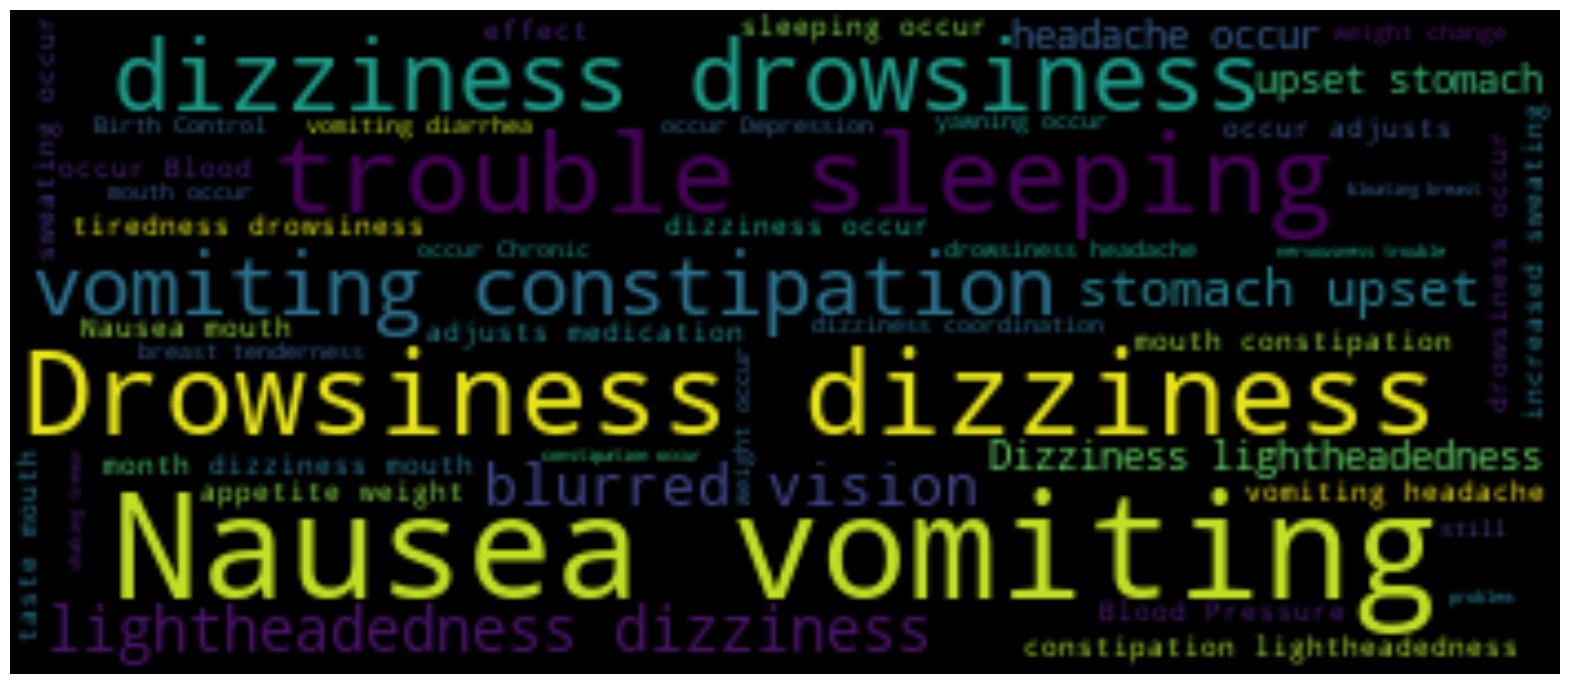

In [29]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=100,width=350,height=150,min_word_length=5).generate(" ".join(data[data.sentiment==2].review))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

### 2. For Neutral reviews

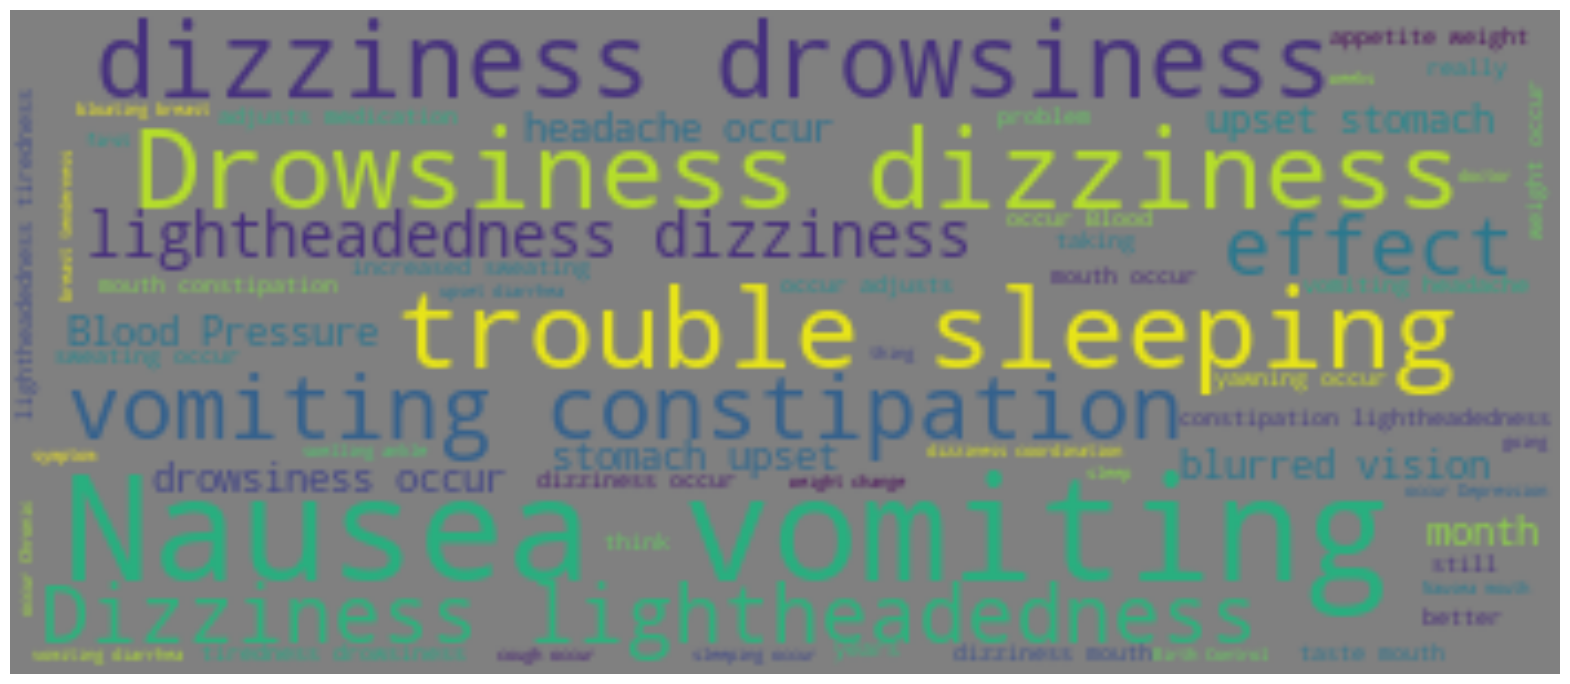

In [30]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=350,height=150,min_word_length=5,background_color='grey').generate(" ".join(data[data.sentiment==1].review))
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()

### 3. For Negative reviews

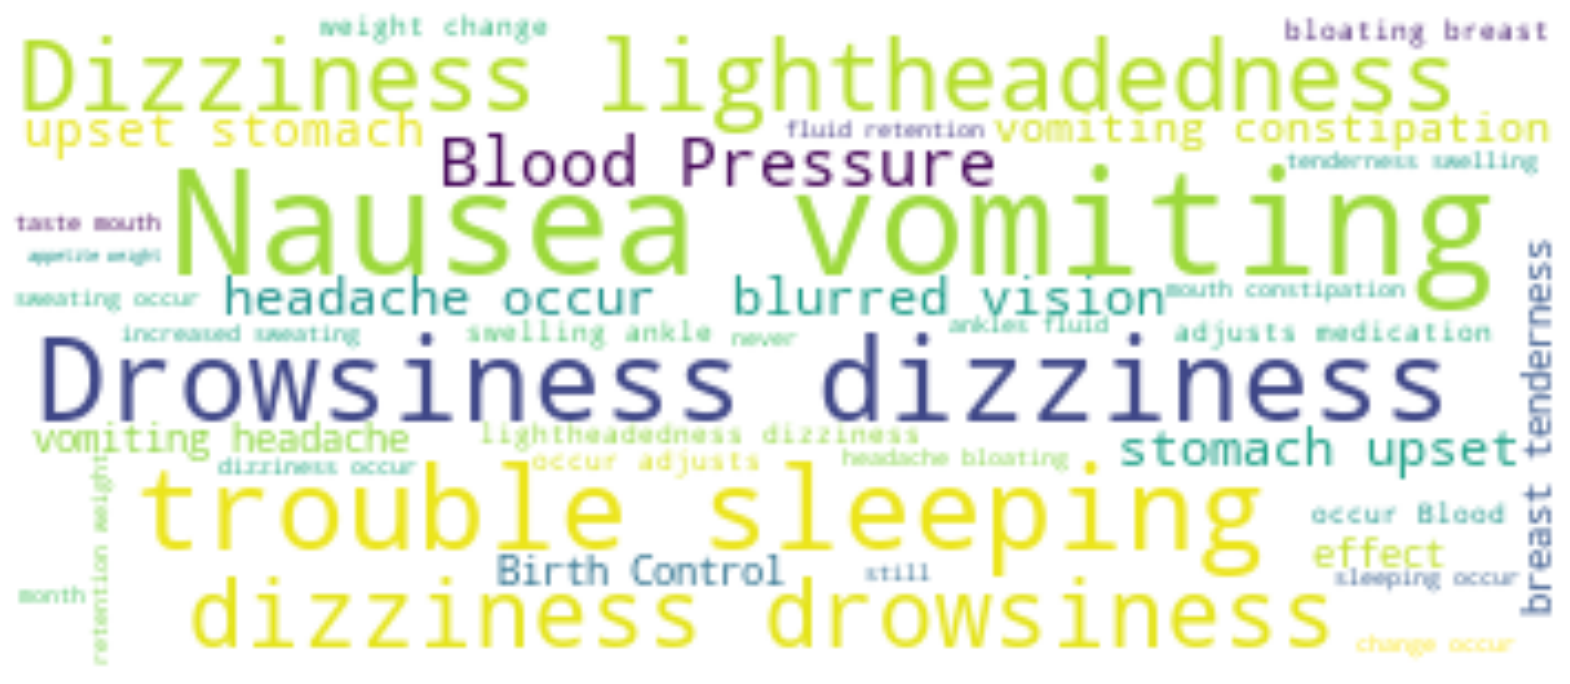

In [31]:
plt.figure(figsize=(20,20))
WC=WordCloud(max_words=1000,width=350,height=150,min_word_length=5,background_color='white').generate(" ".join(data[data.sentiment==0].review))
plt.axis('off')
plt.imshow(WC,interpolation='bilinear')
plt.show()

## Data Preprocessing

#### 1. Removing the HTML tags

In [32]:
def cleaner_text(text):
  #removing the html tags
  text=re.sub(r"<.*?>"," ",text)
  #replace "â" with simple a
  text=re.sub(r"â","a",text)
  return text

In [33]:
data.review=data.review.apply(cleaner_text)

In [34]:
data.head()

,review,sentiment
0,Stuffy Nose I'm a retired physician and of all...,2
1,Cold Symptoms cleared me right up even with my...,2
2,Other why did my PTINR go from a normal of 2.5...,1
3,Other FALLING AND DON'T REALISE IT,0
4,Other My grandfather was prescribed this medic...,0


In [35]:
data.review[15]

'Birth Control The birth control was very easy to use and it worked but the side effects where not that great. I started to lose my hair like ALOT! I ended up with a two bald patches on the left side of my head they where about 2 1/2a?\x9d X 1 1/2a?\x9d  it was pretty bad and embarrassing... after I stopped taking them my hair started to grow back to normal. Ia??ll mostly never take this birth control again hope you all do your research before taking a new birth control. Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, or  weight  gain may occur.'

#### 2. Removing punctuations and extra spaces

In [36]:
import string
punctuations=string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def remove_marks(text):
  text=re.sub(r"[!\"#$%&\\'()*+,-\.\/:;<=>\?\]\^_\`{\|}\]\0-9]+"," ",text)
  text=re.sub(r"\x9d"," ",text)
  #removing extra space
  text=re.sub(r"\s{2,}"," ",text)
  return text

In [38]:
data.review=data.review.apply(remove_marks)

In [39]:
data.head()

,review,sentiment
0,Stuffy Nose I m a retired physician and of all...,2
1,Cold Symptoms cleared me right up even with my...,2
2,Other why did my PTINR go from a normal of to ...,1
3,Other FALLING AND DON T REALISE IT,0
4,Other My grandfather was prescribed this medic...,0


In [40]:
data.review[15]

'Birth Control The birth control was very easy to use and it worked but the side effects where not that great I started to lose my hair like ALOT I ended up with a two bald patches on the left side of my head they where about a X a it was pretty bad and embarrassing after I stopped taking them my hair started to grow back to normal Ia ll mostly never take this birth control again hope you all do your research before taking a new birth control Nausea vomiting headache bloating breast tenderness or weight gain may occur '

#### 3. Chat word treatment

In [41]:
dd={
    "D":'had',
    "S":'is',
    'IA':'it',
    "LL":'will',
    "VE":'have',
    "M":'am',
    "U":'you',
    "T":'not',
    "COULDN":'could',
    "SHOULDN":'should',
    "WOULDN":'would',
    "DIDN":'did',
    "DON":'do',
    "DOESN":'does',
    "AREN":'are',
    "WASN":'was',
    "AIN":'is',
    "ISN":'is',
    'TKTS':'tickets',
    'USF':'useful',
    'C':'see',
    'U':'you',
    "M":'am',
    "VE":'have',
    "LL":'will',
    "T":'not',
    "RE":'are',
    '1':'one',
    '2':'two',
    '3':'three',
    '4':'four',
    '5':'five',
    '6':'six',
    '7':'seven',
    '8':'eight',
    '9':'nine',
    '10':'ten',
    'ND':'second',
     "MG":'milligram',
     "XS":"times",
    "X":"times",

}

In [42]:
def chat_word(text):
    new_text=[]
    for word in text.split():
            if word.upper() in dd.keys():
                new_text.append(dd[word.upper()])
            else:
                new_text.append(word)
    return " ".join(new_text)


In [43]:
data.review=data.review.astype(str)
d={
    "D":'had',
    "S":'is',
    "LL":'will',
    "VE":'have',
    "M":'am',
    "U":'you',
    "T":'not',
    "COULDN":'could',
    "SHOULDN":'should',
    "WOULDN":'would',
    "DIDN":'did',
    "DON":'do',
    "DOESN":'does',
    "AREN":'are',
    "WASN":'was',
    "AIN":'is',
    "ISN":'is',
    'TKTS':'tickets',
    'USF':'useful',
    'C':'see',
    'U':'you',
    "M":'am',
    "VE":'have',
    "LL":'will',
    "T":'not',
    "RE":'are',
    '1':'one',
    '2':'two',
    '3':'three',
    '4':'four',
    '5':'five',
    '6':'six',
    '7':'seven',
    '8':'eight',
    '9':'nine',
    '10':'ten',
    'ND':'second',
     "MG":'milligram',
     "XS":"times",
    "X":"times",
    "AMP":'adenosine monophosphate',
    "ETC":'and others',
    'RX':'times',
    "BC":'birth control',
    "LBS":'launois bensaude syndrome',
    'DIARRHEA':'diarrhoea',
    'UTI':'urinary tract infection',
    'DR':'data rate',
    'MED':'meditation',
    'NOPE':'no',
    'CD':'cluster of differentiation',
    'LOL':'laughing out loud',
    'PCP':'primary care provider',
    'MGS':'meckel gruber syndrome',
    'HRS':'hours',
    'RD':'rare disease',
    'ER':'emergency room',
    'IBS':'irritable bowel syndrome',
    'GP':'general practitioner',
    '@':'',
    'VL':'viral load',
    'NREVOUS':'nervous',
    'PTINR':'prothrombin time International normalized ratio',
    's':'is',
    'HEP':'hepatitis',
    'UK':'united kingdom',
    'IUD':'intrauterine device',
    'CKD':'chronic kidney disease',
    'MCG':'microgram',
    'NOV':'november',
    'DR':'doctor',
    'DEPO':'depo-provera',
    'DOC':'doctor',
    'XR':'extended release',
    'RD':'round',
    'ST':'start',
    'BP':'blood pressure',
    'WO':'no',
    'IA':'i',
    'YAY':'happiness',
    'RSQUO':" ",
    'YRS':'years',
    'OMG':'oh my god',
    'TH':'sixth',
    'ESP':'especially',
    "PSYCH":'psyche',
    'OB':'obstetrician',
    'GYN':'gynecologist',
    'IHAVE':'i have',
    'MYPERIOD':'my period',
    'HAVEHAD':'have had',
    'YR':'year',
    'DNC':'dilation and curettage',
    'G':' ',
    'DVTS':'Deep Vein Thrombosis',
    'I’M':'i am',
    'OTC':'over the counter',
    'ARB':'Angiotensin Receptor Blocker',
}
def chat_treatment(text):
    new_text=[]
    for word in text.split():
        if word.upper() in d.keys():
            new_text.append(d[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)
data.review=data.review.apply(chat_treatment)

In [44]:
data.head()

,review,sentiment
0,Stuffy Nose I am a retired physician and of al...,2
1,Cold Symptoms cleared me right up even with my...,2
2,Other why did my prothrombin time Internationa...,1
3,Other FALLING AND do not REALISE IT,0
4,Other My grandfather was prescribed this medic...,0


In [45]:
data.review[300000]

'Joint Damage causing Pain and Loss of Function Upset stomach constipation diarrhoea dizziness lightheadedness drowsiness loss of appetite or headache may occur'

### Removing the extra spaces

In [46]:
def remove_spaces(text):
    text=re.sub(r'\s{2,}'," ",text)
    return text

In [47]:
data.review=data.review.apply(remove_spaces)

In [48]:
data.head()

,review,sentiment
0,Stuffy Nose I am a retired physician and of al...,2
1,Cold Symptoms cleared me right up even with my...,2
2,Other why did my prothrombin time Internationa...,1
3,Other FALLING AND do not REALISE IT,0
4,Other My grandfather was prescribed this medic...,0


#### Removing the Stopwords

In [49]:
stops=stopwords.words('english')
def remove_stops(text):
  new_text=[]
  #converting the text into the lower-case
  text=text.lower()
  tokens=word_tokenize(text)
  for word in tokens:
    if word not in stops:
      new_text.append(word)
  return " ".join(new_text)


In [50]:
data.review=data.review.apply(remove_stops)

In [51]:
data.review[15]

'birth control birth control easy use worked side effects great started lose hair like alot ended two bald patches left side head times pretty bad embarrassing stopped taking hair started grow back normal mostly never take birth control hope research taking new birth control nausea vomiting headache bloating breast tenderness weight gain may occur'

#### Performing the Lemmatization

In [52]:
nlp=spacy.load('en_core_web_sm')
def lemmatization_text(text):
    new_text=[]
    tokens=nlp(text)
    for word in tokens:
        new_text.append(word.lemma_)
    return " ".join(new_text)
    

In [53]:
data.review=data.review.apply(lemmatization_text)

### Saving this csv file

In [1]:
data.to_csv('complete_pre_processed_second_dataset.csv')

NameError: name 'data' is not defined